# Import Libraries

In [8]:
# Week 3 — Cell 1: Importing Libraries (Multiple Linear Regression)

import kagglehub
import shutil
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Optional seaborn styling
sns.set(style="whitegrid", context="notebook")

print("Libraries imported successfully!")


Libraries imported successfully!


# Download dataset

In [9]:
# Week 3 — Cell 2: Download Student Performance dataset (KaggleHub)

# Download the dataset
#cached_path = kagglehub.dataset_download("uciml/student-performance")

#print("Cached path:", cached_path)

# Choose target folder
#target_folder = r"D:\AD_Lab\datasets\student_performance"

# Create folder if it doesn't exist
#os.makedirs(target_folder, exist_ok=True)

# Copy all files from cache → target folder
#for file_name in os.listdir(cached_path):
#    src = os.path.join(cached_path, file_name)
#    dst = os.path.join(target_folder, file_name)
#    shutil.copy(src, dst)

#print("Dataset copied to:", target_folder)


# Load Dataset

In [10]:
# Week 3 — Cell 3: Load Student Performance dataset

DATA_PATH = r"D:\AD_Lab\datasets\student_performance\student-mat.csv"

df = pd.read_csv(DATA_PATH, sep=';')  # this dataset uses ';' as delimiter

print("Dataset loaded successfully!")
print("\nShape:", df.shape)

print("\nFirst 5 rows:")
display(df.head())

print("\nDataset Info:")
print(df.info())
print("\nStatistical Summary:")
display(df.describe())

Dataset loaded successfully!

Shape: (395, 33)

First 5 rows:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


# Feature Selection

In [11]:
# Week 3 — Cell 4: Select features and target variable

# Features (predictors)
features = ['studytime', 'absences', 'G1', 'G2']

# Target (student performance)
target = 'G3'

# Create X and y
X = df[features]
y = df[target]

print("Selected Features:")
print(X.head())

print("\nTarget Variable:")
print(y.head())

print("\nShape of X:", X.shape)
print("Shape of y:", y.shape)


Selected Features:
   studytime  absences  G1  G2
0          2         6   5   6
1          2         4   5   5
2          2        10   7   8
3          3         2  15  14
4          2         4   6  10

Target Variable:
0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: int64

Shape of X: (395, 4)
Shape of y: (395,)


# Train-test Split


In [12]:
# Week 3 — Cell 5: Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42
)

print("Training set shape:")
print(" X_train:", X_train.shape)
print(" y_train:", y_train.shape)

print("\nTesting set shape:")
print(" X_test :", X_test.shape)
print(" y_test :", y_test.shape)


Training set shape:
 X_train: (296, 4)
 y_train: (296,)

Testing set shape:
 X_test : (99, 4)
 y_test : (99,)


# Train Multiple Linear Regression Model

In [13]:
# Week 3 — Cell 6: Train multiple linear regression model

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

print("Model trained successfully!")

# Display model parameters
print("\nIntercept (b0):", model.intercept_)

coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print("\nModel Coefficients:")
display(coeff_df)


Model trained successfully!

Intercept (b0): -1.924378462643423

Model Coefficients:


,Feature,Coefficient
0,studytime,-0.086904
1,absences,0.035819
2,G1,0.156159
3,G2,0.990024


# Predict and Evaluate

In [14]:
# Week 3 — Cell 7: Predictions and evaluation

# Predict on test data
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f" R² Score: {r2:.4f}")


Model Evaluation Metrics:
 Mean Squared Error (MSE): 4.15
 R² Score: 0.8200


# Actual vs Predicted Scatter Plot

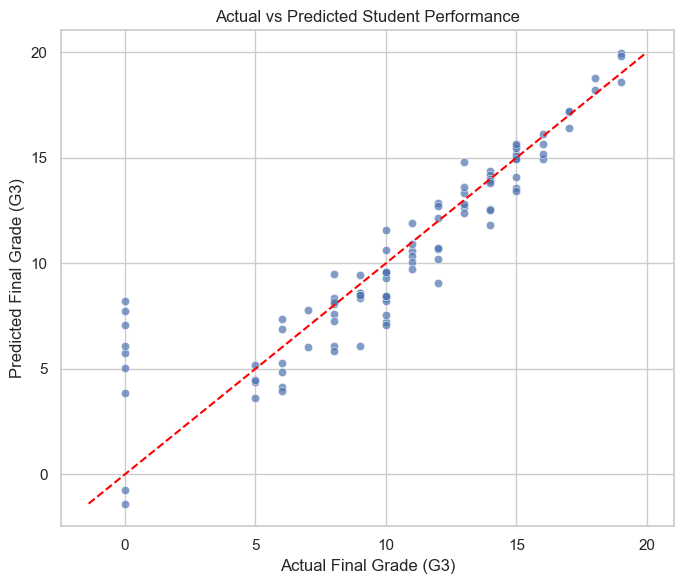

In [15]:
# Week 3 — Cell 8: Actual vs Predicted values scatter plot

plt.figure(figsize=(7,6))

sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)

# Reference line: perfect prediction (y = x)
max_val = max(y_test.max(), y_pred.max())
min_val = min(y_test.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.xlabel("Actual Final Grade (G3)")
plt.ylabel("Predicted Final Grade (G3)")
plt.title("Actual vs Predicted Student Performance")

plt.tight_layout()
plt.show()
